In [2]:
import pickle
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report


# Load your precomputed TF-IDF features
dbfile = open('Train', 'rb')
Train_idf = pickle.load(dbfile)
dbfile = open('Validate', 'rb')
Validate_idf = pickle.load(dbfile)

# Assuming you have labels corresponding to the TF-IDF features
# Replace this with your actual labels
y_train = pd.read_csv("train_data.csv")['y']
y_val = pd.read_csv("validate_data.csv")['y']
n_clusters = 30  # Adjust this based on your specific use case
y_train = pd.read_csv("train_data.csv")['y']
# Determine the range of k values to explore
k_values = range(1, 11)  # Adjust the upper limit based on your use case
final_k=0
# Initialize an empty list to store accuracy for each k
accuracy_values = []
max_acc = 0
# Iterate over k values and fit KMeans for each
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    train_clusters = kmeans.fit_predict(Train_idf)

    # Create a new DataFrame with cluster assignments
    cluster_df_train = pd.DataFrame({'cluster': train_clusters, 'y': y_train})

    # Map cluster labels to the most frequent true label in each cluster
    cluster_label_mapping = cluster_df_train.groupby('cluster')['y'].agg(lambda x: x.value_counts().index[0]).to_dict()
    cluster_df_train['predicted_label'] = cluster_df_train['cluster'].map(cluster_label_mapping)

    # Evaluate the clustering performance using known labels
    accuracy = accuracy_score(cluster_df_train['y'], cluster_df_train['predicted_label'])
    accuracy_values.append(accuracy)
    if(accuracy>=max_acc):
        max_acc = accuracy
        final_k=k



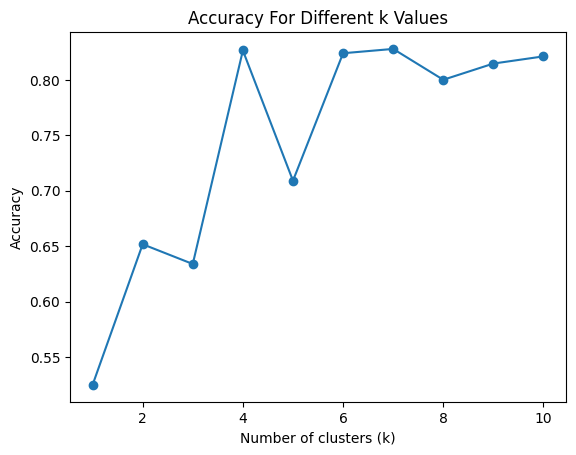

In [4]:
import matplotlib.pyplot as plt
# Plot the accuracy values for different k values
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy For Different k Values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[16]:
import pickle
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report


# Load your precomputed TF-IDF features
dbfile = open('Train', 'rb')
Train_idf = pickle.load(dbfile)
dbfile = open('Validate', 'rb')
Validate_idf = pickle.load(dbfile)

# Assuming you have labels corresponding to the TF-IDF features
# Replace this with your actual labels
y_train = pd.read_csv("train_data.csv")['y']
y_val = pd.read_csv("validate_data.csv")['y']
n_clusters = 30  # Adjust this based on your specific use case
y_train = pd.read_csv("train_data.csv")['y']
# Determine the range of k values to explore
k_values = range(1, 11)  # Adjust the upper limit based on your use case
final_k=0
# Initialize an empty list to store accuracy for each k
accuracy_values = []
max_acc = 0
# Iterate over k values and fit KMeans for each
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    train_clusters = kmeans.fit_predict(Train_idf)

    # Create a new DataFrame with cluster assignments
    cluster_df_train = pd.DataFrame({'cluster': train_clusters, 'y': y_train})

    # Map cluster labels to the most frequent true label in each cluster
    cluster_label_mapping = cluster_df_train.groupby('cluster')['y'].agg(lambda x: x.value_counts().index[0]).to_dict()
    cluster_df_train['predicted_label'] = cluster_df_train['cluster'].map(cluster_label_mapping)

    # Evaluate the clustering performance using known labels
    accuracy = accuracy_score(cluster_df_train['y'], cluster_df_train['predicted_label'])
    accuracy_values.append(accuracy)
    if(accuracy>=max_acc):
        max_acc = accuracy
        final_k=k

# Display the DataFrame with TF-IDF vector representations
kmeans = KMeans(n_clusters=final_k, random_state=42)
train_clusters = kmeans.fit(Train_idf)
dbfile = open('kMeans', 'ab')
pickle.dump(kmeans, dbfile)
dbfile.close()

# In[17]:


import matplotlib as plt
# Plot the accuracy values for different k values
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy For Different k Values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Accuracy')
plt.show()

